In [3]:
#Importing the python packages 
import numpy as np
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pylab as plt
%matplotlib inline
import logging
import ast
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from math import log, sqrt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [4]:
 tripadvisor_hotel_reviews = pd.read_csv("TA_restaurants_curated.csv")

In [5]:

tripadvisor_hotel_reviews.head(30)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
5,5,Ciel Bleu Restaurant,Amsterdam,"['Contemporary', 'International', 'Vegetarian ...",6.0,4.5,$$$$,745.0,"[['A treat!', 'Wow just Wow'], ['01/01/2018', ...",/Restaurant_Review-g188590-d696902-Reviews-Cie...,d696902
6,6,Zaza's,Amsterdam,"['French', 'International', 'Mediterranean', '...",7.0,4.5,$$ - $$$,1455.0,"[['40th Birthday with my Family', 'One of the ...",/Restaurant_Review-g188590-d1014732-Reviews-Za...,d1014732
7,7,Blue Pepper Restaurant And Candlelight Cruises,Amsterdam,"['Asian', 'Indonesian', 'Vegetarian Friendly',...",8.0,4.5,$$$$,675.0,"[['Great Experience', 'A true delight'], ['01/...",/Restaurant_Review-g188590-d697058-Reviews-Blu...,d697058
8,8,Teppanyaki Restaurant Sazanka,Amsterdam,"['Japanese', 'Asian', 'Vegetarian Friendly', '...",9.0,4.5,$$$$,923.0,"[['Great Food & Service!', 'Superior food and ...",/Restaurant_Review-g188590-d697009-Reviews-Tep...,d697009
9,9,Rob Wigboldus Vishandel,Amsterdam,"['Dutch', 'Seafood', 'Fast Food']",10.0,4.5,$,450.0,"[['Excellent Herring', 'Lovely, rustic fish sh...",/Restaurant_Review-g188590-d1955652-Reviews-Ro...,d1955652


In [5]:
tripadvisor_hotel_reviews.shape

(125527, 11)

In [8]:
for col in tripadvisor_hotel_reviews.columns:
    print(col)

Unnamed: 0
name
city
cuisine_style
ranking
rating
price_range
reviews_number
reviews
URL_TA
ID_TA


In [7]:
tripadvisor_hotel_reviews.rename(columns={'Name': 'name',
            'City': 'city',
            'Ranking': 'ranking',
            'Rating': 'rating',
            'Reviews': 'reviews',
            'Cuisine Style':'cuisine_style',
            'Price Range':'price_range',
            'Number of Reviews':'reviews_number'}, inplace=True)

In [9]:
tripadvisor_hotel_reviews['City'] = tripadvisor_hotel_reviews['city'].str.lower()
tripadvisor_hotel_reviews['Name'] = tripadvisor_hotel_reviews['name'].str.lower()

In [10]:
print(sum(tripadvisor_hotel_reviews.duplicated()))

0


In [11]:
tripadvisor_hotel_reviews.isnull().sum()

Unnamed: 0            0
name                  0
city                  0
cuisine_style     31351
ranking            9651
rating             9630
price_range       47855
reviews_number    17344
reviews            9616
URL_TA                0
ID_TA                 0
City                  0
Name                  0
dtype: int64

In [12]:
tripadvisor_hotel_reviews['rating'].ffill(axis=0,inplace=True)
tripadvisor_hotel_reviews['rating'].ffill(axis=0,inplace=True)

tripadvisor_hotel_reviews['price_range'] = tripadvisor_hotel_reviews['price_range'].fillna('NA')

In [13]:
tripadvisor_hotel_reviews['ranking'] = tripadvisor_hotel_reviews['ranking'].astype('category')
tripadvisor_hotel_reviews['reviews_number'] = tripadvisor_hotel_reviews['reviews_number'].fillna(0)
tripadvisor_hotel_reviews['reviews_number'] = tripadvisor_hotel_reviews['reviews_number'].round(0).astype('int')

In [14]:
tripadvisor_hotel_reviews.drop(['URL_TA'],axis=1,inplace=True)
tripadvisor_hotel_reviews.drop(['ID_TA'],axis=1,inplace=True)

In [15]:
tripadvisor_hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Unnamed: 0      125527 non-null  int64   
 1   name            125527 non-null  object  
 2   city            125527 non-null  object  
 3   cuisine_style   94176 non-null   object  
 4   ranking         115876 non-null  category
 5   rating          125527 non-null  float64 
 6   price_range     125527 non-null  object  
 7   reviews_number  125527 non-null  int32   
 8   reviews         115911 non-null  object  
 9   City            125527 non-null  object  
 10  Name            125527 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(7)
memory usage: 10.1+ MB


In [16]:
print("Cities: {}".format(tripadvisor_hotel_reviews.City.nunique()))

Cities: 31


In [17]:
tripadvisor_hotel_reviews.describe()

,Unnamed: 0,rating,reviews_number
count,125527.000000,125527.000000,125527.000000
mean,3974.686131,3.909263,107.888239
std,4057.687698,0.905808,291.776974
min,0.000000,-1.000000,0.000000
25%,1042.000000,3.500000,4.000000
50%,2445.000000,4.000000,22.000000
75%,5626.000000,4.500000,92.000000
max,18211.000000,5.000000,16478.000000


In [17]:
tripadvisor_hotel_reviews['price_range'].replace(['$', '$$ - $$$', '$$$$'], ['cheap', 'medium', 'expensive'], inplace=True)

In [18]:
tripadvisor_hotel_reviews['price_range'].unique()

array(['medium', 'expensive', 'cheap', 'NA'], dtype=object)

In [63]:
categories=np.array([-1.0,1.0,1.5,2.0,2.5,3,3.5,4,4.5,5])

tripadvisor_hotel_reviews.rating = pd.Categorical(tripadvisor_hotel_reviews.rating, categories=categories, ordered=True)

tripadvisor_hotel_reviews['rating'] = np.where(tripadvisor_hotel_reviews['rating'] == -1.0,0,0)

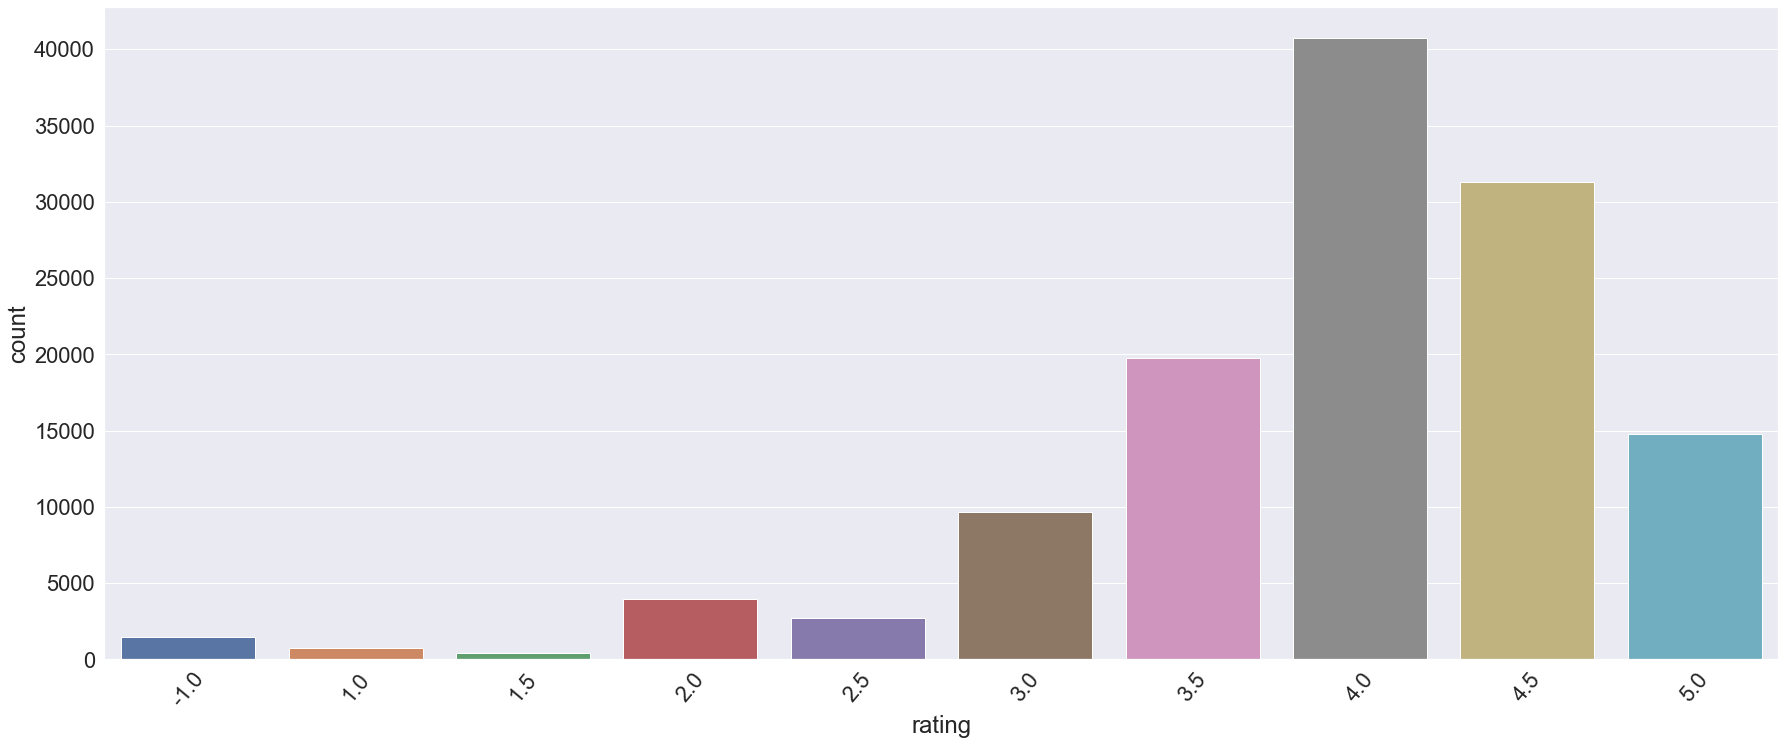

In [58]:
data_hotel_reviews_plot = tripadvisor_hotel_reviews[["name","rating"]].drop_duplicates() 
sns.set(font_scale=2)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=50)
sns.countplot(ax = ax,x = "rating",data=tripadvisor_hotel_reviews)

In [26]:
text = " "
for i in range(tripadvisor_hotel_reviews.shape[0]):
    text = " ".join([text,tripadvisor_hotel_reviews["city"].values[i]])

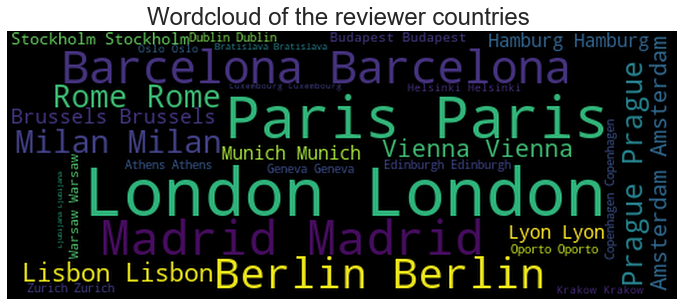

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='Black', width = 500,\
                      height=200, max_font_size=50, max_words=50).generate(text)
wordcloud.recolor(random_state=312)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='lanczos')#interpolation of the image lanczos for a better quality image
plt.title("Wordcloud of the reviewer countries ")
plt.axis("off")
plt.show()

In [29]:
min_rating = tripadvisor_hotel_reviews.rating.min() 
max_rating = tripadvisor_hotel_reviews.rating.max()
mean_rating=tripadvisor_hotel_reviews.rating.mean()
print('The hotel ratings are between '+ str(min_rating) +" "+'and'+" "+str(max_rating)+" "+'with a mean of'+" "+
      str(round(mean_rating,2)))

The hotel ratings are between -1.0 and 5.0 with a mean of 3.91


In [30]:
tripadvisor_hotel_reviews['city'].isnull().sum()

0

In [31]:
euro_restaurant_count = tripadvisor_hotel_reviews['city'].value_counts(dropna=False)
total_number_of_restaurants = euro_restaurant_count.sum()
print("\n Total number of restaurants: {}".format(total_number_of_restaurants))
print(euro_restaurant_count)


 Total number of restaurants: 125527
London        18212
Paris         14874
Madrid         9543
Barcelona      8425
Berlin         7078
Milan          6687
Rome           5949
Prague         4859
Lisbon         3986
Vienna         3724
Amsterdam      3434
Brussels       3204
Hamburg        3131
Munich         2995
Lyon           2930
Stockholm      2705
Budapest       2606
Warsaw         2352
Copenhagen     2109
Dublin         2082
Athens         1938
Edinburgh      1865
Zurich         1667
Oporto         1580
Geneva         1572
Krakow         1354
Helsinki       1228
Oslo           1213
Bratislava     1067
Luxembourg      657
Ljubljana       501
Name: city, dtype: int64


In [20]:
tripadivsor_clone_reviews_df = tripadvisor_hotel_reviews.copy()

In [21]:
indexNames = tripadivsor_clone_reviews_df[ tripadivsor_clone_reviews_df['city'] == 0 ].index
tripadivsor_clone_reviews_df.drop(indexNames , inplace=True)

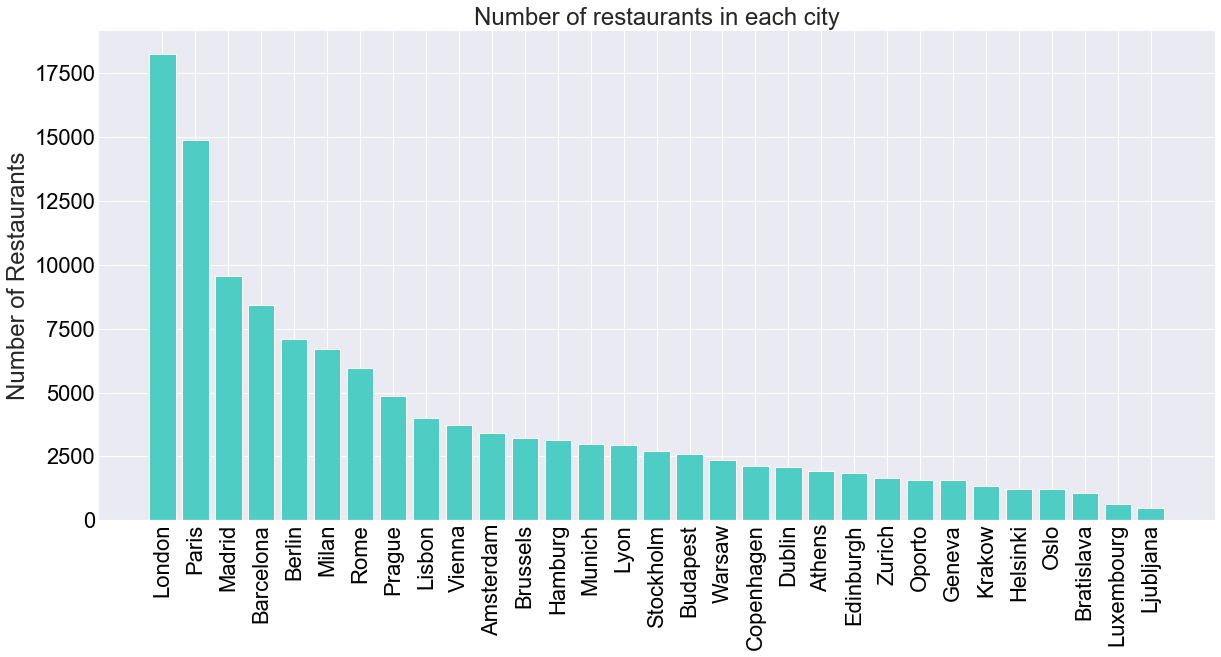

In [35]:
fig = plt.figure(figsize=(20, 9))
ax = plt.subplot();

restaurants_in_cities = tripadivsor_clone_reviews_df.groupby('city').name.count().sort_values(ascending = False)

plt.bar(x = restaurants_in_cities.index, height=restaurants_in_cities, color="#4ECDC4");
plt.xticks(rotation='90');
plt.ylabel('Number of Restaurants');
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['left'].set_visible(False);
plt.title('Number of restaurants in each city');
ax.tick_params(direction='out', length=0, width=0, colors='black');

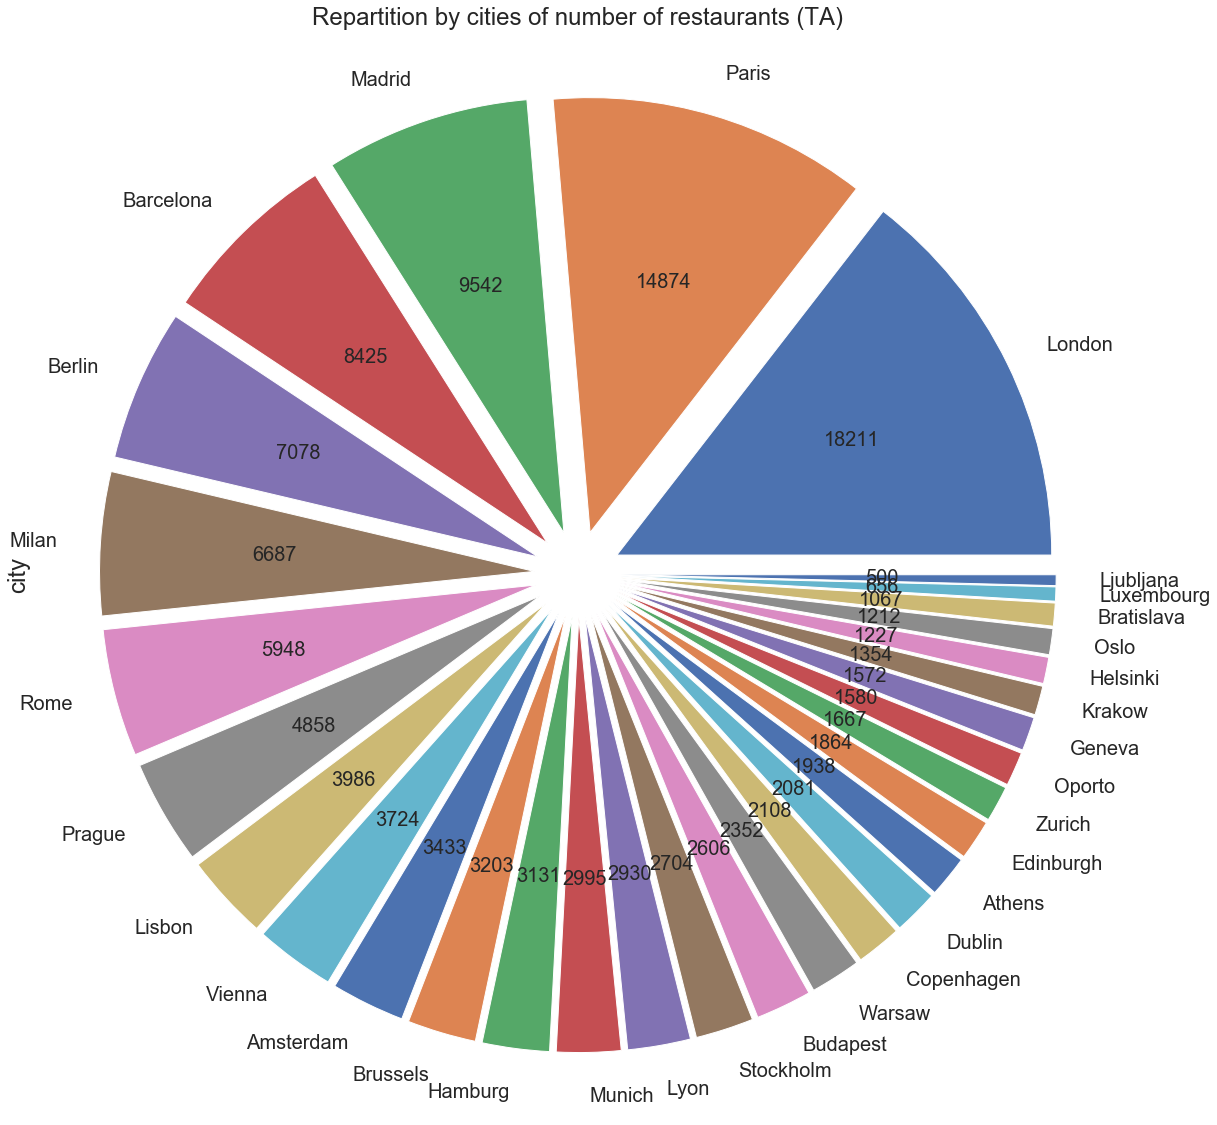

In [36]:
euro_restaurant_count = tripadivsor_clone_reviews_df['city'].value_counts(dropna=False)
total_number_of_restaurants = euro_restaurant_count.sum()
pie_restaurants = [0.1 for i in euro_restaurant_count]
explode = [0.1 for i in euro_restaurant_count]
euro_restaurant_count.plot(kind='pie', figsize=(20, 20), explode=explode, fontsize=20, autopct=lambda v: int(v*total_number_of_restaurants/100),
                        title="Repartition by cities of number of restaurants (TA)")

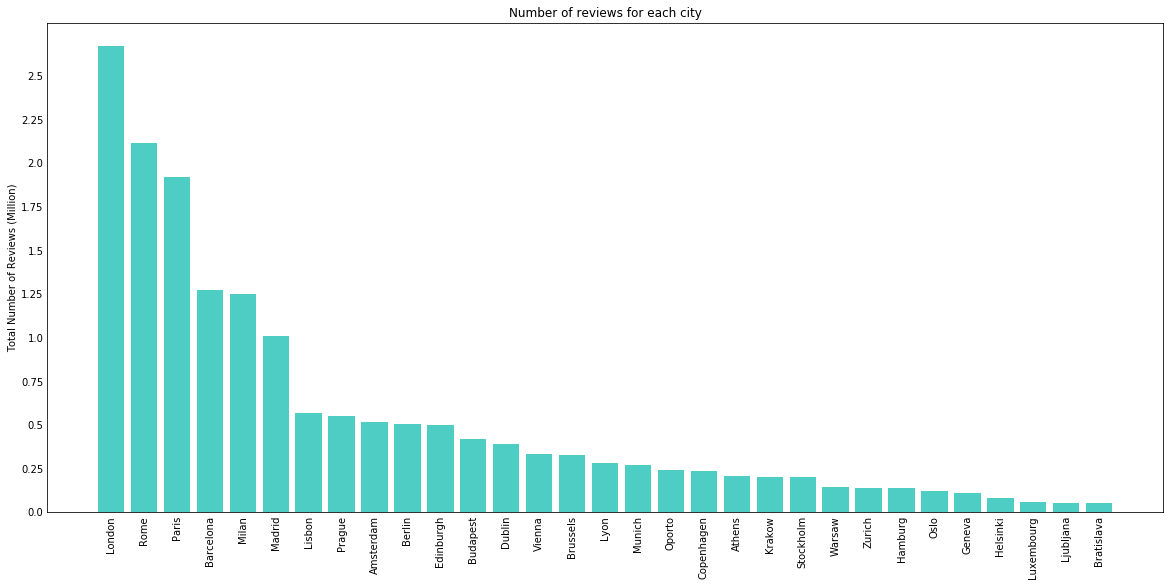

In [22]:
df_reviews_count = tripadivsor_clone_reviews_df.groupby('city').reviews_number.sum().sort_values(ascending=False)
count_millions = np.arange(0, 2.14e6, 20e4)
count = np.arange(0, 2.6, 0.25)

fig = plt.figure(figsize=(20, 9))
ax = plt.subplot();

plt.bar(x = df_reviews_count.index, height=df_reviews_count, color="#4ECDC4");
plt.xticks(rotation='90');
plt.yticks(count_millions, count);
plt.ylabel('Total Number of Reviews (Million)');

plt.title('Number of reviews for each city');
ax.tick_params(direction='out', length=0, width=0, colors='black');

In [43]:
total_reviews_per_city = pd.DataFrame(tripadivsor_clone_reviews_df.groupby('city').reviews_number.sum())
total_places_per_city = pd.DataFrame(tripadivsor_clone_reviews_df.groupby('city').name.count())

reviews_per_city = pd.merge(total_reviews_per_city, total_places_per_city, how='outer', on='city')
reviews_per_city.rename(columns={'name':'number_of_places'}, inplace=True)
reviews_per_city['avg_reviews'] = round(reviews_per_city.reviews_number / reviews_per_city.number_of_places, 2)
reviews_per_city.sort_values(by='avg_reviews', ascending=False, inplace=True)

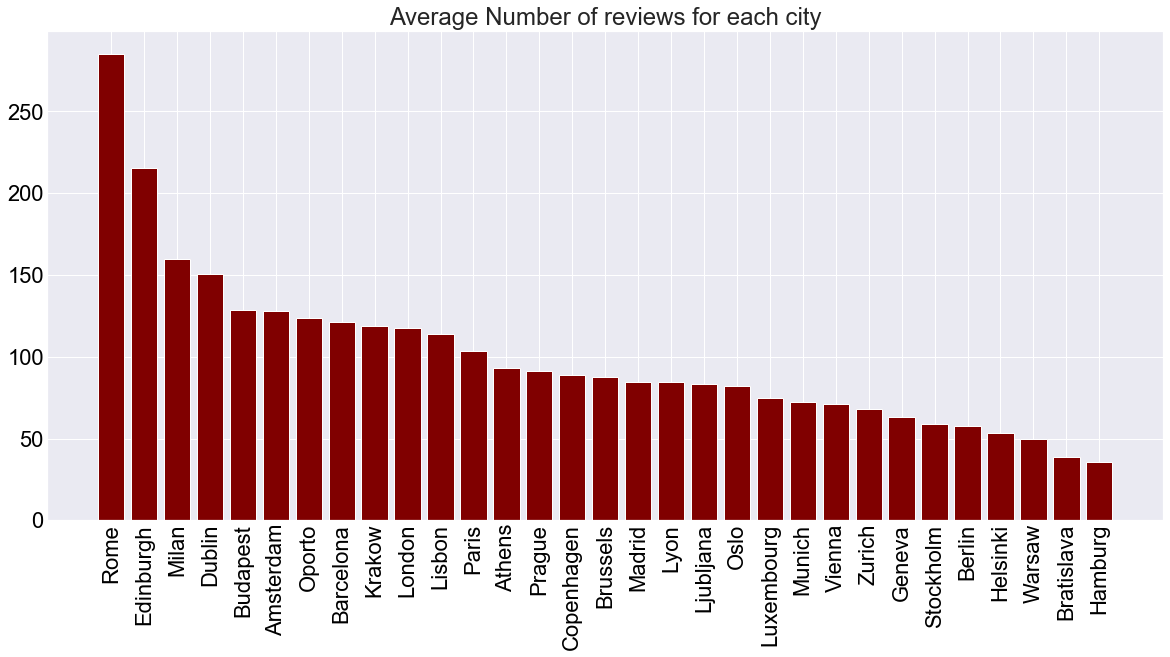

In [135]:
fig = plt.figure(figsize=(20, 9))
ax = plt.subplot();

plt.bar(x = reviews_per_city.index, height=reviews_per_city.avg_reviews, color="#800000");
plt.xticks(rotation='90');

plt.title('Average Number of reviews for each city');
ax.tick_params(direction='out', length=0, width=0, colors='black');

In [ ]:
# we find the Bayesian Estimate to better sort the best rated Hotels

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
where:

v = number of reviews per restaurant
m = mimimum number of reviews required to be listed in the chart
R = average review of the restaurant
C = mean review across all restaurants

In [44]:
# To calculate C 
C = tripadivsor_clone_reviews_df['rating'].mean()
print('The mean review across all restaurants is ', str(C)[0:5])

The mean review across all restaurants is  3.909


In [45]:
# To calulate m 
# The minimum number of review a restaurant needs to have
m = tripadivsor_clone_reviews_df['reviews_number'].quantile(0.50)
print('The minimum number of reviews required',m)

The minimum number of reviews required 22.0


In [19]:
# get restaurants that have at crossed m  number of reviews
TA_data = tripadivsor_clone_reviews_df.copy().loc[tripadivsor_clone_reviews_df['reviews_number'] >= m]
print(str(TA_data.shape[0]) + ' restaurants can be included in the chart')

NameError: name 'tripadivsor_clone_reviews_df' is not defined

In [47]:
# create a function that calculate the weighted review for each restaurant
def weighted_review(x, m=m, C=C):
    # v is the number of reviews of a particular restaurant
    v = x['reviews_number']
    # R is the average rating 
    R = x['rating']
    # weighted rating
    WR = (v/(v+m) * R) + (m/(m+v) * C)
    # return weighted rating
    return WR

In [48]:
# create a new column of df as'score' where to store this value 
TA_data['score'] = TA_data.apply(weighted_review, axis=1)

In [ ]:

# input city you want to select 
city = str(input('Enter City Name(in  lowercase): '))
# input price range 
price_range = str(input('Enter Price Range in which you want: "cheap", "medium", "expensive" or "all" '))

# if the price range is 'all'
if price_range == 'all':
# only filter the city 
    city_data = TA_data.loc[TA_data['city'] == city,:]
else:
# otherwise filter the city and price range
    city_data = TA_data.loc[(TA_data['city'] == city) & (TA_data['price_range'] == price_range),:]

# sort restaurant by score 
city_data = city_data.sort_values('score', ascending=False)
# show top 10 rated resturant in that city and price range 
city_data[['name', 'cuisine_style', 'rating', 'price_range']].head(20)

In [58]:
import anvil.server
anvil.server.connect("ZTYVR6TZ4VVA4NEDPRTA5JMD-RVVEQXUFWAT3QH7H")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [76]:
@anvil.server.callable
def TA_recommendation(name):
    with anvil.media.TempFile(file) as file_name:
        file.content_type == 'text/csv'
        df = pd.read_csv(file_name)
        if price_range == 'all':
            city_data = df.loc[df['city'] == city,:]
            else:
                city_data = df.loc[(df['city'] == city) & (df['price_range'] == price_range),:]
                city_data = df.sort_values('score', ascending=False)
                ta_recommend=df[['name', 'cuisine_style', 'rating', 'price_range']].head(20)
                return(ta_recommend)
            anvil.server.wait_forever()

SyntaxError: invalid syntax (<ipython-input-76-362ffb8b6674>, line 8)

In [ ]:
data = tripadivsor_clone_reviews_df.iloc[:,[1,2,3,4,5,6,7,8,10]]

In [22]:
cols = ['cuisine_style', 'price_range']
for col in cols: 
    tripadivsor_clone_reviews_df[col] = tripadivsor_clone_reviews_df[col].astype(str)

new_col = []
# for each row of cuisine style, eliminate symbol characters 
for row in np.arange(tripadivsor_clone_reviews_df.shape[0]):
    c = tripadivsor_clone_reviews_df['cuisine_style'][row].replace("[", "").replace(']', '')
    d = tripadivsor_clone_reviews_df['price_range'][row]
    # attach price range to the string 
    e = c + ' ' + d 
    # append string to new list new_col
    new_col.append(e)
    
# add this column on dataset and name it description
tripadivsor_clone_reviews_df['description'] = new_col

In [27]:
def cuisine_count(_list):
    cuisine_dict = {'UnknownCuisine': 0}
    for cuisines in _list:
        if cuisines is not np.nan:
            cuisines = ast.literal_eval(cuisines)  
            for cuisine in cuisines:  
                if cuisine in cuisine_dict:
                    cuisine_dict[cuisine] += 1
                else :
                    cuisine_dict[cuisine] = 1
        else:
            cuisine_dict['UnknownCuisine'] +=1
    #print(cuisines)
    return(cuisine_dict)


In [50]:
import operator
from matplotlib import cm
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)
def plotCuisine(cui,count,type = 'bar',city='Dublin'):
    if type == 'bar':
        fig, axes = plt.subplots(1,1, figsize = (20,20))
    elif type == 'pie':    
        fig, axes = plt.subplots(1,1, figsize = (7,7))
    lists = sorted(cui.items(), key=operator.itemgetter(1),reverse=True)
    x, y = zip(*lists[:count])
    col = cm.inferno_r(np.linspace(.7,.2, len(x)))
    if type == 'bar':
        axes.bar(x,y,color = col)
        axes.set_ylabel('Count')
        axes.set_xlabel('Cuisine')
        axes.set_xticklabels(x,rotation = 90)
    elif type == 'pie':
        axes.pie(y, labels = x, autopct=lambda pct: func(pct, y))
        axes.set_title(city,fontsize=15)
    axes.set_facecolor('lightgrey')

In [ ]:
for city in list(tripadivsor_clone_reviews_df['city']=='Dublin'):
    cui = cuisine_count(tripadivsor_clone_reviews_df[tripadivsor_clone_reviews_df['city'] == 'Dublin']['cuisine_style'])
    plotCuisine(cui,10,'pie',city)

C:\Users\Rishi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


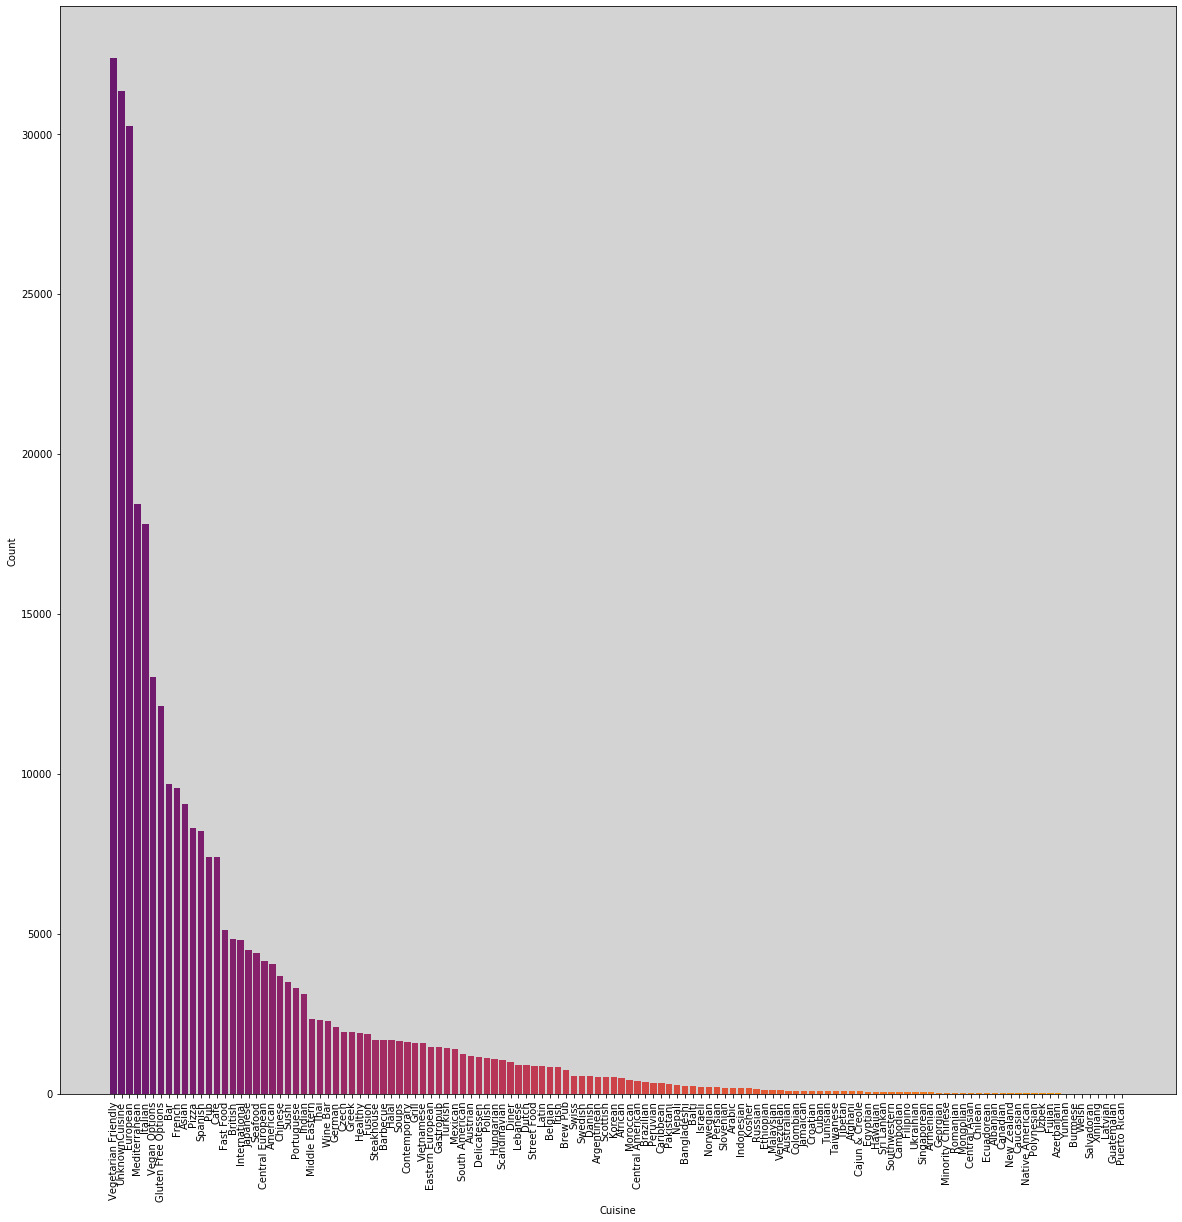

In [46]:
cui = cuisine_count(tripadivsor_clone_reviews_df['cuisine_style'])
plotCuisine(cui, len(cui))

In [28]:
m = tripadivsor_clone_reviews_df['reviews_number'].quantile(0.95)
TA_data = tripadivsor_clone_reviews_df.copy().loc[tripadivsor_clone_reviews_df['reviews_number'] >= m]
TA_data = TA_data.reset_index(drop=True)

# create matrix with descriptions removing stopwords and filling in the decription fields
tfidf = TfidfVectorizer(stop_words='english')
TA_data['description']= TA_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(TA_data['description'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
def get_recommendations(name, city = 'all', cosine_sim=cosine_sim):
    city = city
    
    # reset indeces
    indexes = pd.Series(TA_data.index, index=TA_data['name']).drop_duplicates()
    
    # Get the index of the movie that matches the title
    idx = indexes[name]

    # Get the pairwsie similarity scores of all restaurant in relation to that restaurant
    simulation_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the restaurants based on the similarity scores
    simulation_scores = sorted(simulation_scores, key=lambda x: x[1], reverse=True)
    
    # Get the restaurants indices
    restaurant_indexes = [i[0] for i in simulation_scores]
    
    # get name, city and description of restaurant 
    simulation_scores = TA_data[['name','city','description']].iloc[restaurant_indexes]
    
    # if city is set to all, 
    if city != 'all':
        # only show the ones from that city 
        r = simulation_scores.loc[simulation_scores['city'] == city, :].head(10)
    else:
        # else show all 
        r = TA_data[['name','city','description']].iloc[restaurant_indexes].head(10)

    # Return the top 10 most similar restaurants
    return r

In [ ]:
name = str(input('Insert the name of the restaurant in lower case: '))
city = str(input('Insert the city in lower case : '))

print('If you liked ', name, 'then, in ', city, ' you could also try out similar restaurants:' )
get_recommendations(name, city=city)